# 2019 Fordgo Bike Data Exploration 
## by Long Nguyen

## Investigation Overview

> In this project, I want to investigate the relationship between trip duration and bikers' age/start day based on users' types and their gender.

## Dataset Overview
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

> The dataset consists of 183412 trips recorded on February and March 2019. 

In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [63]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [64]:
#drop duplicates
df.drop_duplicates(inplace=True)
#drop NA values
df.dropna(inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [65]:
#Convert to consistent data types
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)
df['member_birth_year'] = df['member_birth_year'].astype('int64')

In [66]:
#Create new column
df['member_age'] = 2021 - df['member_birth_year']

In [67]:
df['start_time_day']=df['start_time'].dt.strftime("%A")
df['end_time_day']=df['end_time'].dt.strftime("%A")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Member's age vs Trip Duration(s) by User Types

> The visualization supported my hypothesis that younger people would spend more time on a bike trip. The plot showed that a typical riders would be in their 30s. There is no difference between type of users

Text(0, 0.5, 'Duration(s)')

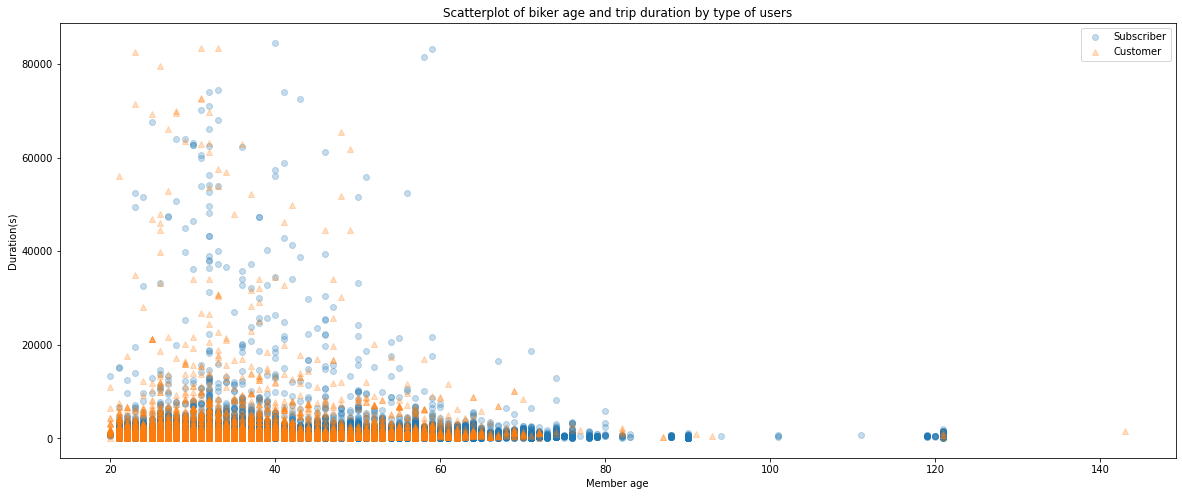

In [68]:
cat_markers = [['Subscriber', 'o'], ['Customer', '^']]
plt.figure(figsize=[20, 8])
for cat, marker in cat_markers:
    df_cat = df[df['user_type'] == cat]
    plt.scatter(data = df_cat, x = 'member_age', y = 'duration_sec', marker = marker,alpha = 0.25)
plt.legend(['Subscriber','Customer'])
plt.title('Scatterplot of biker age and trip duration by type of users')
plt.xlabel('Member age')
plt.ylabel('Duration(s)')

## Member's age vs Trip Duration(s) by Gender


> Most bikers of 3 genders type are around their 30s spending more time on the trip than others. From visualization, I find out that the outlier 143 is a female rider (I won't be removing it)

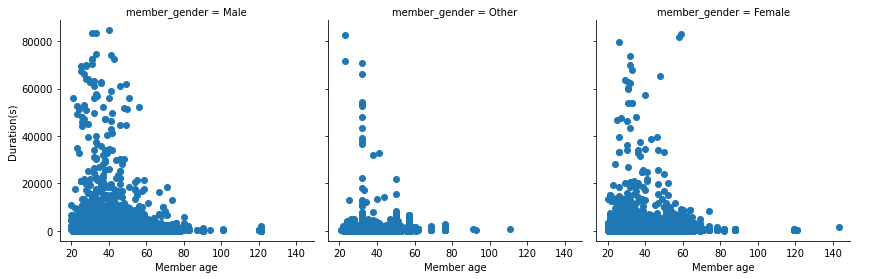

In [75]:
g = sb.FacetGrid(data = df, col = 'member_gender',height=4)
g.map(plt.scatter, 'member_age', 'duration_sec')
g.set_xlabels('Member age')
g.set_ylabels('Duration(s)')
g.add_legend()

## Start Day vs Trip Duration(s) by User Types

>  Customers spend more time on the trip than subscribers and most on weekend. This result is surprising

>  People spend more time bike riding during weekend

Text(0, 0.5, 'Duration(s)')

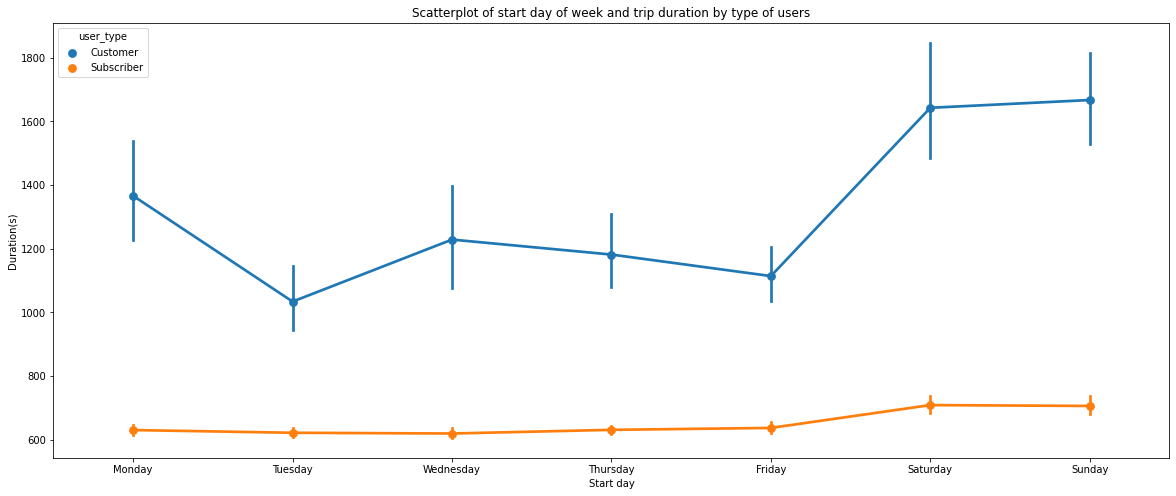

In [73]:
plt.figure(figsize=[20, 8])
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sb.pointplot(data = df, x = 'start_time_day', y = 'duration_sec', hue='user_type', order=order)
plt.title('Scatterplot of start day of week and trip duration by type of users')
plt.xlabel('Start day')
plt.ylabel('Duration(s)')

## Start Day vs Trip Duration(s) by Gender

> The visualization shows quite a surprising result with others spend the most time on the trip while male bikers spend the least time on the trip

> Trip duration for all riders are longer on weekends

Text(0, 0.5, 'Duration(s)')

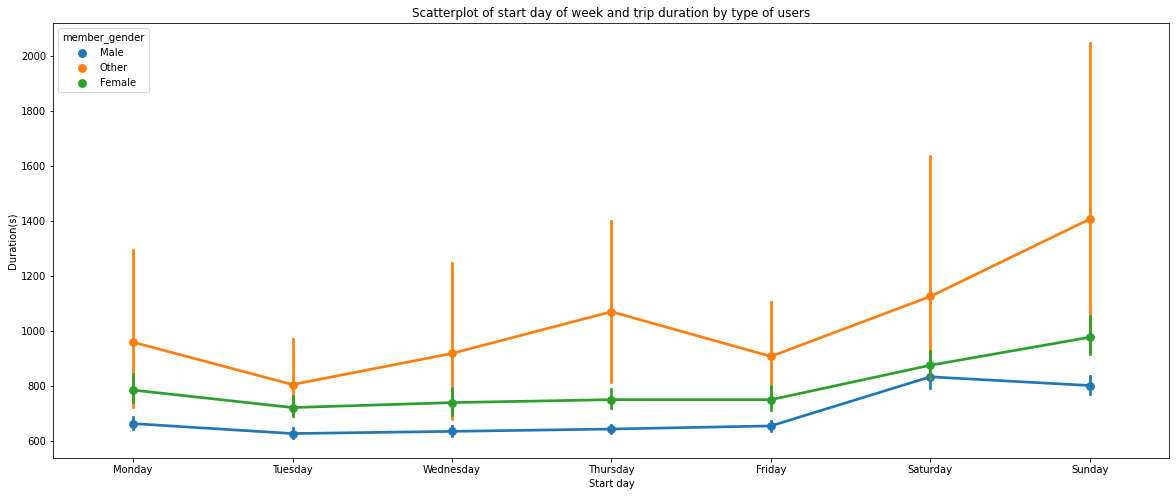

In [74]:
plt.figure(figsize=[20, 8])
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sb.pointplot(data = df, x = 'start_time_day', y = 'duration_sec', hue='member_gender', order=order)
plt.title('Scatterplot of start day of week and trip duration by type of users')
plt.xlabel('Start day')
plt.ylabel('Duration(s)')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [61]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --template output_toggle --post serve

Traceback (most recent call last):
  File "c:\users\long\pycharmprojects\pythonproject\venv\lib\site-packages\traitlets\traitlets.py", line 535, in get
    value = obj._trait_values[self.name]
KeyError: 'template_paths'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Long\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Long\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Long\PycharmProjects\pythonProject\venv\Scripts\jupyter-nbconvert.EXE\__main__.py", line 7, in <module>
  File "c:\users\long\pycharmprojects\pythonproject\venv\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "c:\users\long\pycharmprojects\pythonproject\venv\lib\site-p